# Chapter 1: Clustering for Dataset Exploration

## Unsupervised Learning - introduction

* Unsupervised Learning finds patterns in data
* E.g., *clustering* customers by their purchases
* Compressing the data using purchase patters (*dimension reduction*)

## Supervised vs unsupervised learning

* *Supervised* learning finds patters for a prediction task
* E.g., classify tumors as benign or cancerous (*labels*)
* Unsupervised learnging finds patterns in data, but **without** a specific prediction task in mind

## Exercise: How many clusters?

You are given an array points of size 300x2, where each row gives the (x, y) co-ordinates of a point on a map. 
Make a scatter plot of these points, and use the scatter plot to guess how many clusters there are.

`matplotlib.pyplot` has already been imported as `plt`. The objectives:

* Create an array called `xs` that contains the values of `points[:,0]` - that is, column 0 of points.
* Create an array called `ys` that contains the values of `points[:,1]` - that is, column 1 of points.
* Make a scatter plot by passing `xs` and `ys` to the `plt.scatter()` function.
* Call the `plt.show()` function to show your plot.

**How many clusters do you see?**

```python
xs = points[:,0]
ys = points[:,1]
plt.scatter(xs, ys)
plt.show()
```

![plot 1](./images/plot1.jpg "plot 1")

## Clustering 2D points

From the scatter plot of the previous exercise, you saw that the points seem to separate into **3 clusters**.
You'll now create a `KMeans` model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the `.predict()` method.

You are given the array points from the previous exercise, and also an array `new_points`.

```python
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)
```

## Let's see a more real-life example

In [6]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)

In [4]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')

# k-means clustering with scikit-learn

from sklearn.datasets import load_iris
samples = load_iris()['data']

print(samples[45:55])

[[4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]


In [7]:
# avoid memory leakage in Windows
import os
os.environ["OMP_NUM_THREADS"] = '1'

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(samples)

labels = model.predict(samples)
print(labels[45:55])

[1 1 1 1 1 0 0 2 0 0]


In [8]:
# Cluster labels for new samples

new_samples = samples[-3:]
print(new_samples)

[[6.5 3.  5.2 2. ]
 [6.2 3.4 5.4 2.3]
 [5.9 3.  5.1 1.8]]


In [9]:
new_labels = model.predict(new_samples)
print(new_labels)

[2 2 0]


## Scatter plot

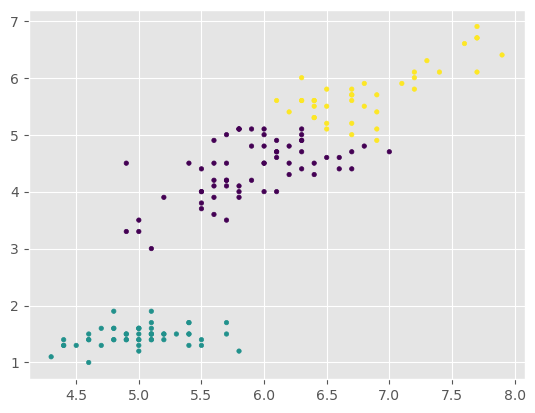

In [10]:
xs = samples[:,0]
ys = samples[:,2]
plt.scatter(xs, ys, c=labels, s=10)
plt.show()

## Evaluating a clustering

* Can check correspondence with e.g. Iris species
* Measure quality of a clustering
* Informs choice of how many clusters to look for

For example, regarding the Iris dataset, we might have the following:

* k-means found 3 clusters amongst the Iris samples
* Do the clusters correspond to the actual species?

![iris species](./images/iris_species.jpg "iris species")

## Cross tabulation with Pandas

* The "Cluster vs species" problem is a "cross-tabulation"
* For that, we can use the `pandas` library
* For example, in the Iris dataset we have:

```python
print(species)

['setosa', 'setosa', 'versicolor', 'virginica' ...]
```

### Aligning labels and species

```python
import pandas as pd
df = pd.DataFrame({'labels': labels, 'species': species})
print(df)
```

![iris species labels](./images/iris_species_labels.jpg "iris species labels")

### Let's Crosstab now

```python
ct = pd.crosstab(df['labels'], df['species'])
print(ct)
```

![iris species labels crosstab](./images/iris_species_labels_crosstab.jpg "iris species labels crosstab")

### Real-life example with the Iris dataset

In [11]:
samples = load_iris()['data']
species = pd.Series(load_iris()['target']).map({0:'setosa',1:'versicolor',2:'virginica'})

In [12]:
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit and determine the cluster labels of new_points: labels
labels = model.fit_predict(samples)

In [13]:
df = pd.DataFrame({'labels': labels, 'species': species})
print(df[45:55])

    labels     species
45       0      setosa
46       0      setosa
47       0      setosa
48       0      setosa
49       0      setosa
50       1  versicolor
51       1  versicolor
52       2  versicolor
53       1  versicolor
54       1  versicolor


In [14]:
# Crosstab of labels and species

ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  setosa  versicolor  virginica
labels                                
0            50           0          0
1             0          48         14
2             0           2         36


In [15]:
# Inertia measures clustering quality

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(samples)
print(model.inertia_)

78.85144142614601


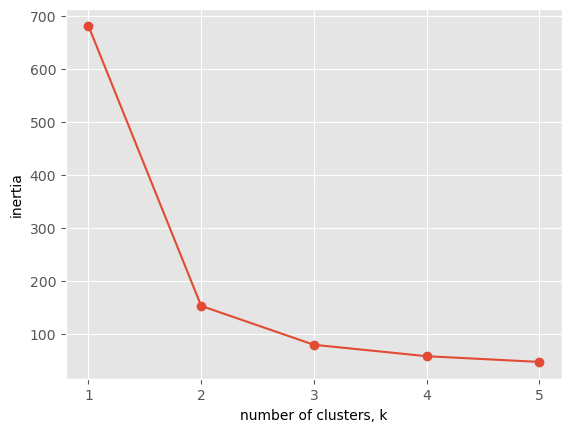

In [16]:
# The number of clusters

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Measuring clustering quality

* Using only samples and their cluster labels
* A good clustering has tight clusters
* Samples in each cluster bunched together

## Inertia measures clustering quality

* Measures how spread out the cluster are (*lower* is better)
* Distance from each sample to centroid of its cluster
* After calling `fit()`, inertia is available as attribute `inertia_`
* In fact, k-means already attempts to minimize the inertia when choosing clusters

```python
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(samples)
print(model.inertia_)

# will print a number, eg 78.9408414261
```

## How many clusters to choose?

After some point, the number of clusters does not improve the inertia minimization (in this example, 3 clusters seems a good choice):

![inertia clusters plot](./images/inertia_clusters_plot.jpg "inertia clusters plot")

## Example of inertia computation

```python
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
```

## Cross-tabulation example

* Create a `KMeans` model called `model` with 3 clusters.
* Use the `.fit_predict()` method of `model` to fit it to `samples` and derive the cluster labels. 
* Using `.fit_predict()` is the same as using `.fit()` followed by `.predict()`.
* Create a DataFrame `df` with two columns named '`labels`' and '`varieties`', using `labels` and `varieties`, respectively, for the column values. This has been done for you.
* Use the `pd.crosstab()` function on `df['labels']` and `df['varieties']` to count the number of times each grain variety coincides with each cluster `label`. Assign the result to `ct`.

```python
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)
```

![crosstab example](./images/crosstab_example.jpg "crosstab example")

## Transforming features for better clusterings

In another example, we will use the **Pedmont wines** dataset. 

* This dataset includes 178 samples from 3 distinct varieties of red wine: "Barolo", "Grignolino", and "Barbera".
* Features measure chemical composition, eg alcohol content
* Visual properties like "color intensity"

### Step 1: Clustering the wines

```python
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)
```

### Step 2: Clusters vs. actual wine varieties

```python
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

ct = pd.crosstab(df['labels'], df['varieties'])

print(ct)
```

![wines crosstab](./images/wines_crosstab.jpg "wines crosstab")

We can see that, in this case, the k-means clusters don't correspond well with the actual wine varieties.
The reason is that wine features have very different variances (Variance of a feature measures spread of its values).
This means that we should transform (scale) the feature data, so that the feature have the same variances.

![k-means standard scaler](./images/k_means_standard_scaler.jpg "k-means standard scaler")

### Step 3: sklearn StandardScaler

```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)
```

And an example with pipeline:

```python
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)

from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)

labels = pipeline.predict(samples)
```

![feature standardization improves clustering](./images/feature_standardization_improves_clustering.jpg "feature standardization improves clustering")

### A Real-life example of the "Piedmont Wines" dataset

In [19]:
# Piedmont wines dataset

dataset = pd.read_csv("datasets/piedmont_wine_data.csv",header=0)
dataset.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [30]:
samples = dataset.drop("class_name", axis=1).values
varieties = dataset["class_name"].values

print(varieties[10:20])

['Barolo' 'Barolo' 'Barolo' 'Barolo' 'Barolo' 'Barolo' 'Barolo' 'Barolo'
 'Barolo' 'Barolo']


In [27]:
# Clustering the wines

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

In [28]:
# Clusters vs. varieties

df = pd.DataFrame({'labels': labels,'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0               19       0          50
1                0      46           1
2               29      13          20


In [33]:
# Feature variances

s = dataset.iloc[:,1:]
s.var()

alcohol                     0.659062
malic_acid                  1.248015
ash                         0.075265
alcalinity_of_ash          11.152686
magnesium                 203.989335
total_phenols               0.391690
flavanoids                  0.997719
nonflavanoid_phenols        0.015489
proanthocyanins             0.327595
color_intensity             5.374449
hue                         0.052245
od280                       0.504086
proline                 99166.717355
dtype: float64

In [34]:
# Pipelines sklearn StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)

from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [35]:
labels = pipeline.predict(samples)
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0               48       0           1
1                0      59           3
2                0       0          67


## Normalizing on Stocks Movement dataset

In [37]:
# Stocks data

data = pd.read_csv("datasets/company-stock-movements-2010-2015-incl.csv")
companies = list(data.iloc[:,0])
movements = data.iloc[:,1:].values

In [38]:
# Clustering stocks using KMeans

# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [39]:
# Which stocks move together?

# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values(by='labels')[:15])

    labels                 companies
22       0                        HP
14       0                      Dell
43       1                       SAP
39       1                    Pfizer
37       1                  Novartis
46       1            Sanofi-Aventis
6        1  British American Tobacco
19       1           GlaxoSmithKline
49       1                     Total
52       1                  Unilever
36       2          Northrop Grumman
29       2           Lookheed Martin
4        2                    Boeing
45       3                      Sony
15       3                      Ford
